In [3]:
#Librerias 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.integrate as integrate

In [4]:
#Punto 1

#from google.colab import drive
#drive.mount('/content/drive')

Density = pd.read_csv("data_radius_density.csv")
Density

,radius,density
0,0.000000,0.000000
1,0.040404,0.201008
2,0.080808,0.284268
3,0.121212,0.348155
4,0.161616,0.402015
...,...,...
95,3.838384,1.959179
96,3.878788,1.969464
97,3.919192,1.979695
98,3.959596,1.989873


In [6]:
Density.keys()

Index(['radius', 'density'], dtype='object')

In [7]:
y=[]

for i in range(len(Density["radius"])):
  y.append(2*np.pi*Density["radius"][i]*Density["density"][i])

  I = scipy.integrate.trapz(y, Density["radius"])

print("La masa del disco es: ", I)

ValueError: operands could not be broadcast together with shapes (99,) (0,) 

In [8]:
x = Density["radius"]
y = Density["density"] 

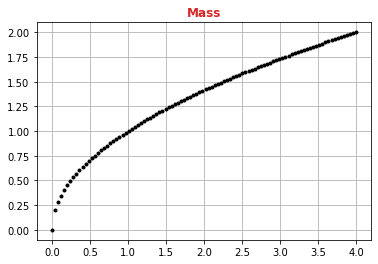

In [9]:
fig,ax=plt.subplots(1,1)
ax.plot(x , y,'.k')
ax.set_title('Mass', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:red'})
plt.grid()


In [12]:
#Punto 2

PvT = pd.read_csv("data_pressure_vs_temparature.csv")
PvT

,Temperature,Pressure
0,4.789201e-08,1.958251e-17
1,6.625061e-08,2.055515e-17
2,8.460922e-08,2.237848e-17
3,1.029678e-07,2.534132e-17
4,1.213264e-07,2.994527e-17
5,1.396850e-07,3.681453e-17
6,1.580436e-07,4.642824e-17
7,1.764022e-07,5.895152e-17
8,1.947608e-07,7.447724e-17
9,2.131194e-07,9.347272e-17


In [13]:
x1 = PvT["Temperature"]
y1 = PvT["Pressure"]

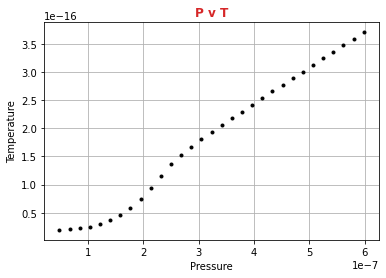

In [14]:
fig,ax=plt.subplots(1,1)
ax.plot(x1 , y1,'.k')
ax.set_title('P v T', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:red'})
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.grid()

In [15]:
Cv = np.gradient(y1,x1)
Cv

array([5.29799802e-11, 7.61486415e-11, 1.30352287e-10, 2.06082997e-10,
       3.12475005e-10, 4.48916825e-10, 6.02904968e-10, 7.63919658e-10,
       9.40191259e-10, 1.11550372e-09, 1.19769793e-09, 1.03501324e-09,
       8.09658111e-10, 7.30340985e-10, 7.01723220e-10, 6.84061313e-10,
       6.71936615e-10, 6.63114111e-10, 6.56443006e-10, 6.51256053e-10,
       6.47135543e-10, 6.43805355e-10, 6.41075324e-10, 6.38810197e-10,
       6.36911237e-10, 6.35304785e-10, 6.33934876e-10, 6.32758315e-10,
       6.31741302e-10, 6.30857069e-10, 6.30445179e-10])

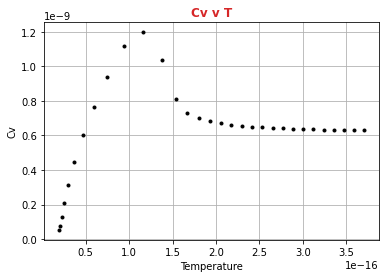

In [16]:
fig,ax=plt.subplots(1,1)
ax.plot(y1 , Cv,'.k')
ax.set_title('Cv v T', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:red'})
plt.xlabel('Temperature')
plt.ylabel('Cv')
plt.grid()


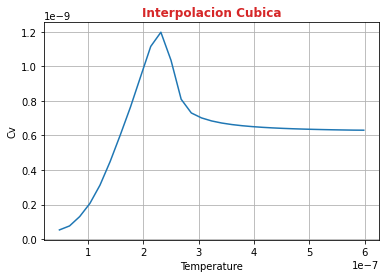

In [17]:
# De la grafica podemos observar que su maximo se encuentra en 1.2, siendo este mismo la temperatura critica del sistema segun el cambio presentado.

from scipy.interpolate import interp1d

p = interp1d(x1,y1, kind="cubic")
c = np.gradient(p(x1), x1)
fig,ax = plt.subplots(1,1)


ax.plot(x1,c)
ax.set_title('Interpolacion Cubica', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:red'})
plt.xlabel('Temperature')
plt.ylabel('Cv')
plt.grid()


In [18]:
#Punto 3


def matrix_power(A,n):

  return np.linalg.matrix_power(A, n)


# Feedback:
```
Exercise 1.
Importation of the data + labeled plot (rho vs. r)	            (max 0.5p):	0.5p
Calculation of the integral                 		              (max 1.5p):	0.5p

Exercise 2.
Importation of the data + labeled plot P vs. T 	               (max 0.5p):	1.0p
Calculation of the derivative and plot Cv vs. T        		   (max 2.0p):	1.0p
Approximation of the critical temperature                         (max 0.5p):	0.0p
Interpolation                                                     (max 1.0p):	0.0p

Exercise 3.
Calculation of the M^n                                 	       (max 2.0p):	0.0p
Function of the M^n                                    	       (max 2.0p):	0.0p

- Total:                                                          (max 10.0p):   3.0p
```

# comments:
* incorrect: ax.plot(y1 , Cv,'.k')